# Sample Code for Lab 02

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

Some useful functions to calculate the errors
Constants for Lab 2
Resistor A = 10k Ohm
Resistor B = 22k Ohm
1 Voltage across entire circuit 10.0 V
2 Voltage across B = 6.88 V
3 Voltage across the parallel resistor system with resistance equal to B (load resistor) = 5.24
4 Voltage across the parallel resistor system with resistance equal to 1 MOhm = 6.83
5 Voltage across series resistor 1 MOhm = 3.39 V
6 Voltage of previous but with 10x attentuation = 4.25

Assignment 2
The shape of the curve should be logarithmic in nature, and the constant of RC should be somewhere close to 2.2 * 10^-4, with a tolerance of 2.2*10^-5
voltage at that time should be 3.35 volts
I observe an exponential rise in voltage a very short time after the switch is closed, after which it levels off to about 4 volts.
time base of 100 microseceonds and voltage division of 1 V

at 0.67 of 4 v, where the time constant should occur, we get a time value of 244 microseconds approxomately close to 220 +- 20, which was our estimation.
See attached table for data
(100/250 + 100/1,000,000 * reading + 0.6 * 10^-9)

RC for discharge is 1.14 milliseconds
calculated value for R is 1.14 Mega Ohms



In [9]:
def scope_get_v_error(reading,div):
    #assumes reading is in volts and div is in volts/cm
    #using the specifications on pg 156 of the scope manual
    error = 0.03*reading + 0.1*div  + 0.001 #1mV
    return error
    
def scope_get_dt_error(reading,div):
    #using the specifications on pg 157 of the scope manual
    #For our purposes we don't care if we use 0.6ns or 0.4ns .... see the manual for context
    sample_interval = div/250.
    error = sample_interval + 100e-6*reading + 0.4e-9
    return error


Load the data from file

In [10]:
data_file = np.loadtxt("lab2_ass02.csv",delimiter=',',skiprows=1)
v = data_file[:,0]
voltage_div = 1.00
dv = scope_get_v_error(v,voltage_div)
time_div = 100e-6 #100 mus /division
t =  10e-6*data_file[:,1] #convert 100 mus to seconds
dt = scope_get_dt_error(t,time_div)
print(dt)

[4.0040e-07 4.8040e-07 5.6040e-07 6.4040e-07 7.2040e-07 8.0040e-07
 8.8040e-07 9.6040e-07 1.0404e-06 1.1204e-06 1.2004e-06 1.2524e-06]


Print the data in latex table format 

In [11]:
for index in range(0, len(v)):
    print("%.2f&%.2f&%.3f&%.3f\\\\" %(v[index],dv[index],t[index]/10e-6,dt[index]/10e-6))
    print("[0.5ex]")
    print("\\hline")


0.00&0.10&0.000&0.004\\
[0.5ex]
\hline
0.96&0.13&8.000&0.005\\
[0.5ex]
\hline
1.96&0.16&16.000&0.006\\
[0.5ex]
\hline
2.72&0.18&24.000&0.006\\
[0.5ex]
\hline
3.16&0.20&32.000&0.007\\
[0.5ex]
\hline
3.40&0.20&40.000&0.008\\
[0.5ex]
\hline
3.56&0.21&48.000&0.009\\
[0.5ex]
\hline
3.72&0.21&56.000&0.010\\
[0.5ex]
\hline
3.80&0.21&64.000&0.010\\
[0.5ex]
\hline
3.92&0.22&72.000&0.011\\
[0.5ex]
\hline
4.00&0.22&80.000&0.012\\
[0.5ex]
\hline
4.04&0.22&85.200&0.013\\
[0.5ex]
\hline


Plot the data 

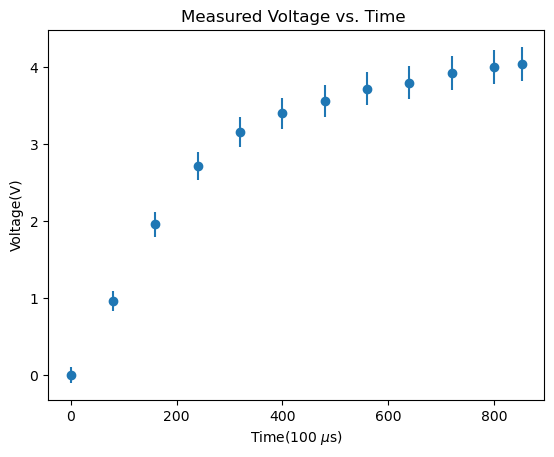

In [12]:
plt.errorbar(x=t/10e-6,y=v,xerr=dt,yerr=dv,fmt='o',label='Data')
plt.xlabel('Time(100 $\mu$s)')
plt.ylabel('Voltage(V)')
plt.title("Measured Voltage vs. Time ")
plt.savefig("RC-Charging.pdf")

Next let's try fitting a line to the data

In [13]:
#Implement capacitor charging theory 
def rc_charging_theory(t,V0,RC):
    v = V0*(1-np.exp(-t/RC))
    return v

In [14]:
#Next we use the curve_fit utility of scipy otimize library to fit a function to the data
params, params_covariance = optimize.curve_fit(f=rc_charging_theory,xdata=t,ydata=v,sigma=dv,absolute_sigma=1)
print("V0 is %.1f +/- %.1f V"%(params[0], math.sqrt(params_covariance[0][0])))
print("RC is %.0f +/- %.0f micro seconds"%(1e6*params[1], 1e6*math.sqrt(params_covariance[1][1])))

V0 is 4.2 +/- 0.2 V
RC is 2516 +/- 244 micro seconds


Here's how you can draw the data and the fit on the same plot

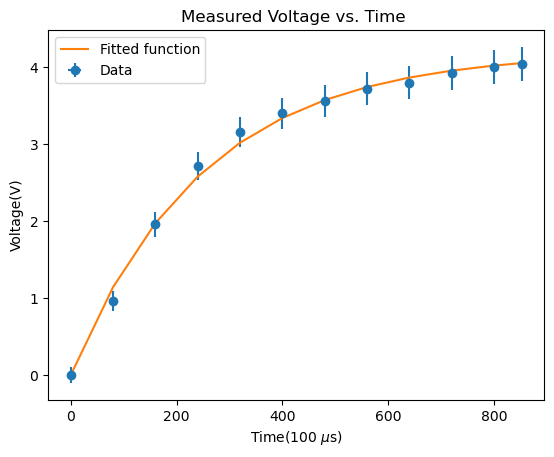

In [17]:
plt.errorbar(x=t/10e-6,y=v,xerr=dt/10e-6,yerr=dv,fmt='o',label='Data')
plt.plot(t/10e-6,rc_charging_theory(t/10e-6,params[0],params[1]/10e-6),label='Fitted function')
plt.legend(loc='best')
plt.xlabel('Time($\mu$s)')
plt.ylabel('Voltage(V)')
plt.title("Measured Voltage vs. Time ")
plt.savefig("RC-Charging-with-fit.pdf")
